In [1]:
# basically learning how to inverse transform to signal

# iPython specific stuff
%matplotlib inline
import IPython.display
from ipywidgets import interact, interactive, fixed

# Packages we're using
import numpy as np
import matplotlib.pyplot as plt
import copy
from scipy.fftpack import fft
from scipy import ifft
from scipy.signal import butter, lfilter
import scipy.ndimage
import soundfile as sf
from scipy import ceil, complex64, float64, hamming, zeros

In [2]:
def stft(x, win, step):
    l = len(x) # length of data
    N = len(win) # length of window
    M = int(ceil(float(l - N + step) / step)) # Number of Windows in the spectrogram
    
    new_x = zeros(N + ((M - 1) * step), dtype = float64)
    new_x[: l] = x 
    
    X = zeros([M, N], dtype = complex64) # Initialization of spectrogram (complex type)
    for m in range(M):
        start = step * m
        X[m, :] = fft(new_x[start : start + N] * win)
    return X

def istft(X, win, step):
    M, N = X.shape
    assert (len(win) == N), "FFT length and window length are different."

    l = (M - 1) * step + N
    x = zeros(l, dtype = float64)
    wsum = zeros(l, dtype = float64)
    for m in range(M):
        start = step * m
        ### Smooth connection
        x[start : start + N] = x[start : start + N] + ifft(X[m, :]).real * win
        wsum[start : start + N] += win ** 2 
    pos = (wsum != 0)
    x_pre = x.copy()
    ### Scaling windows
    x[pos] /= wsum[pos]
    return x



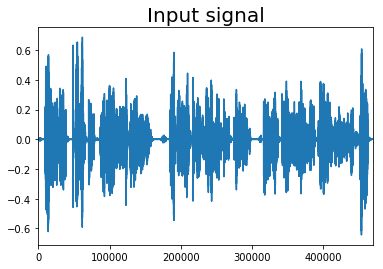

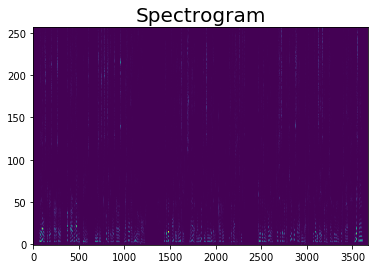

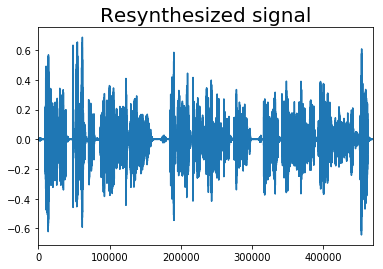

In [3]:
data, fs = \
sf.read('/Users/admin/Desktop/practiceunderpycharm/flac_dataforcnn/10005.flac')
#data = data[:16000 * 3]


fftLen = 512 
win = hamming(fftLen) 
step = int(fftLen / 4)

### STFT
spectrogram = stft(data, win, step)

### iSTFT
resyn_data = istft(spectrogram, win, step)

### Plot
fig = plt.figure()
#fig.add_subplot(311)
plt.plot(data)
plt.xlim([0, len(data)])
plt.title("Input signal", fontsize = 20)
plt.show()
#fig.add_subplot(312)
plt.imshow(abs(spectrogram[:, : int(fftLen / 2 + 1)].T), aspect = "auto", origin = "lower")
plt.title("Spectrogram", fontsize = 20)
plt.show()
#fig.add_subplot(313)
plt.plot(resyn_data)
plt.xlim([0, len(resyn_data)])
plt.title("Resynthesized signal", fontsize = 20)
plt.show()

In [4]:
print('Original signal')
IPython.display.Audio(data=data, rate=fs)

Original signal


In [5]:
print('Reversed signal')
IPython.display.Audio(data=resyn_data, rate=fs)

Reversed signal


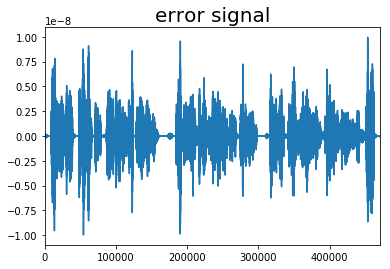

In [12]:
error = resyn_data - data
plt.plot(error)
plt.xlim([0, len(error)])
plt.title("error signal", fontsize = 20)
plt.show()

In [10]:
error

array([-2.32859065e-10, -1.94029035e-10,  2.24999709e-10, ...,
       -4.78233755e-11, -3.86366999e-11, -2.36429552e-11])

In [11]:
resyn_data

array([ 2.13622814e-04, -5.49316600e-04,  6.10353812e-05, ...,
        2.44140577e-04,  4.88281211e-04,  5.18798804e-04])

In [13]:
print('Reversed signal')
IPython.display.Audio(data=error, rate=fs)

Reversed signal
